# Sentiment Analysis of IMDB reviews

## Setup

In [162]:
import pandas as pd

# load the dataset
df = pd.read_csv('/content/IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [163]:
#remove to run for whole dataset
df = df.head(150)
print(df.shape)

(150, 2)


## Basic NLTK

In [169]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [170]:
example = df["review"][8]
print(example)

Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only.


In [171]:
# split the review into individual words
tokens = nltk.word_tokenize(example)
tokens[:10]

['Encouraged',
 'by',
 'the',
 'positive',
 'comments',
 'about',
 'this',
 'film',
 'on',
 'here']

In [172]:
# add nltk tags to words
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Encouraged', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('positive', 'JJ'),
 ('comments', 'NNS'),
 ('about', 'IN'),
 ('this', 'DT'),
 ('film', 'NN'),
 ('on', 'IN'),
 ('here', 'RB')]

In [173]:
# identify named entities in text
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Encouraged/VBN
  by/IN
  the/DT
  positive/JJ
  comments/NNS
  about/IN
  this/DT
  film/NN
  on/IN
  here/RB
  I/PRP
  was/VBD
  looking/VBG
  forward/RB
  to/TO
  watching/VBG
  this/DT
  film/NN
  ./.
  Bad/NNP
  mistake/NN
  ./.
  I/PRP
  've/VBP
  seen/VBN
  950+/CD
  films/NNS
  and/CC
  this/DT
  is/VBZ
  truly/RB
  one/CD
  of/IN
  the/DT
  worst/JJS
  of/IN
  them/PRP
  -/:
  it/PRP
  's/VBZ
  awful/JJ
  in/IN
  almost/RB
  every/DT
  way/NN
  :/:
  editing/NN
  ,/,
  pacing/NN
  ,/,
  storyline/NN
  ,/,
  'acting/VBG
  ,/,
  '/''
  soundtrack/NN
  (/(
  the/DT
  film/NN
  's/POS
  only/RB
  song/JJ
  -/:
  a/DT
  lame/JJ
  country/NN
  tune/SYM
  -/:
  is/VBZ
  played/VBN
  no/RB
  less/JJR
  than/IN
  four/CD
  times/NNS
  )/)
  ./.
  The/DT
  film/NN
  looks/VBZ
  cheap/JJ
  and/CC
  nasty/JJ
  and/CC
  is/VBZ
  boring/VBG
  in/IN
  the/DT
  extreme/NN
  ./.
  Rarely/RB
  have/VBP
  I/PRP
  been/VBN
  so/RB
  happy/JJ
  to/TO
  see/VB
  the/DT
  end/NN
  credits/NNS
  

## VADER Sentiment Scoring

In [174]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [175]:
# the compound score will later be used to determine the accuracy of the model
sia.polarity_scores(example)

{'neg': 0.166, 'neu': 0.662, 'pos': 0.172, 'compound': 0.2362}

In [176]:
# Run the polarity score on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    result[i] = sia.polarity_scores(text)

  0%|          | 0/150 [00:00<?, ?it/s]

In [177]:
# convert results to df
vaders = pd.DataFrame(result).T

# merge scores with df
vaders = vaders.merge(df, how='left', left_index=True, right_index=True)
vaders.head()

,neg,neu,pos,compound,review,sentiment
0,0.203,0.748,0.048,-0.9951,One of the other reviewers has mentioned that ...,positive
1,0.053,0.776,0.172,0.9641,A wonderful little production. <br /><br />The...,positive
2,0.094,0.714,0.192,0.9605,I thought this was a wonderful way to spend ti...,positive
3,0.138,0.797,0.065,-0.9213,Basically there's a family where a little boy ...,negative
4,0.052,0.801,0.147,0.9744,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Plot VADER results

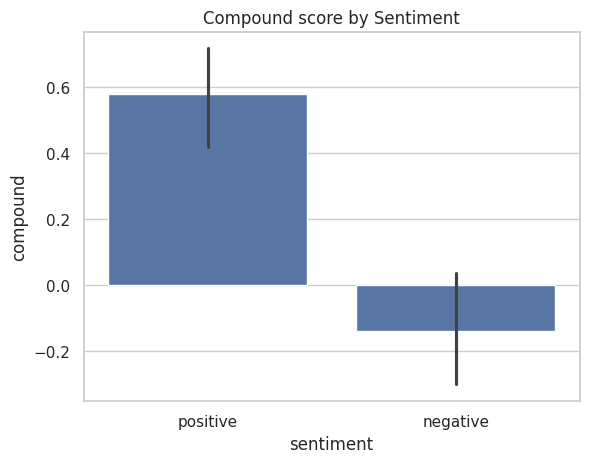

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=vaders, x='sentiment', y='compound')
ax.set_title('Compound score by Sentiment')
plt.show()

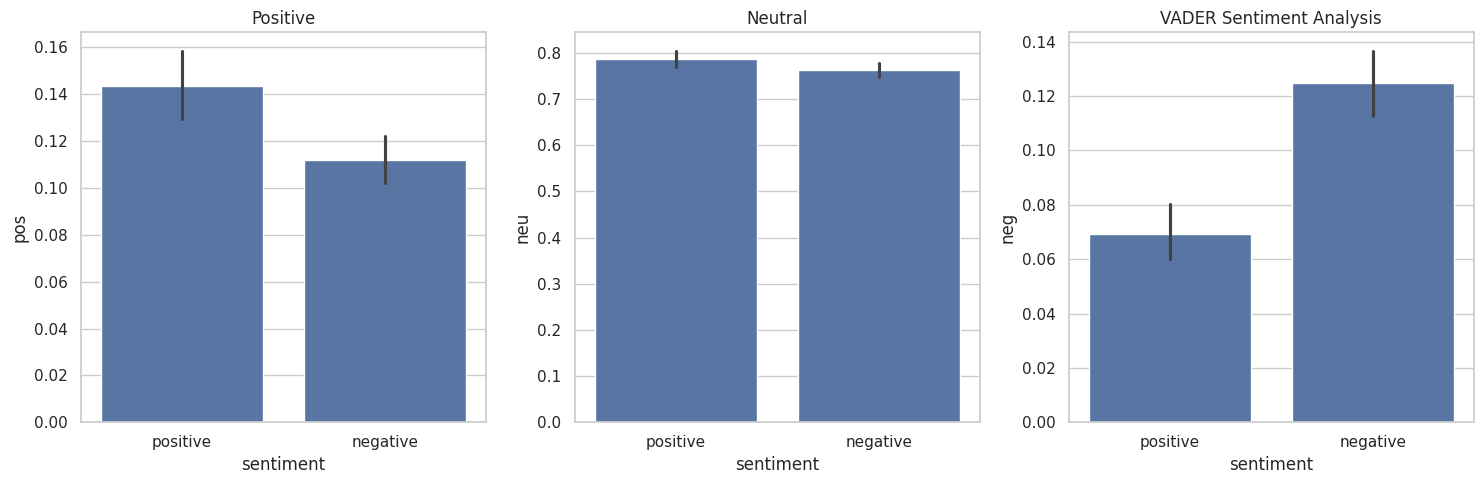

In [179]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='sentiment', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='sentiment', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## RoBERTa sentiment Analysis

In [180]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [181]:
#HuggingFace model that has already been trained on twitter data for sentiment analysis
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [182]:
def polarity_scores_roberta(example):
  # run for Roberta Model
  encoded_text = tokenizer(example, return_tensors='pt') # converts text to 1/0 for model to understand
  # print(encoded_text)
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy() # convert from tensor to numpy to store locally
  scores = softmax(scores)
  # dictionary to store values
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict

In [183]:
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
      text = row['review']
      vader_result = sia.polarity_scores(text)

      vader_result_rename = {}
      for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value

      roberta_result = polarity_scores_roberta(text)
      both = {**vader_result_rename, **roberta_result}
      result[i] = both
    except RuntimeError:
      print(f'Broke for row {i}')

  0%|          | 0/150 [00:00<?, ?it/s]

Broke for row 12
Broke for row 26
Broke for row 29
Broke for row 30
Broke for row 33
Broke for row 48
Broke for row 50
Broke for row 51
Broke for row 58
Broke for row 59
Broke for row 77
Broke for row 92
Broke for row 99
Broke for row 101
Broke for row 126
Broke for row 131
Broke for row 140
Broke for row 142


In [184]:
# convert results to df
roberta_df = pd.DataFrame(result).T

# merge scores with df
results_df = roberta_df.merge(df, how='left', left_index=True, right_index=True)
results_df.head()

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,sentiment
0,0.203,0.748,0.048,-0.9951,0.339792,0.462738,0.197471,One of the other reviewers has mentioned that ...,positive
1,0.053,0.776,0.172,0.9641,0.004337,0.039048,0.956615,A wonderful little production. <br /><br />The...,positive
2,0.094,0.714,0.192,0.9605,0.088475,0.263144,0.648381,I thought this was a wonderful way to spend ti...,positive
3,0.138,0.797,0.065,-0.9213,0.755117,0.211640,0.033243,Basically there's a family where a little boy ...,negative
4,0.052,0.801,0.147,0.9744,0.024546,0.223598,0.751856,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Plot RoBERTa results

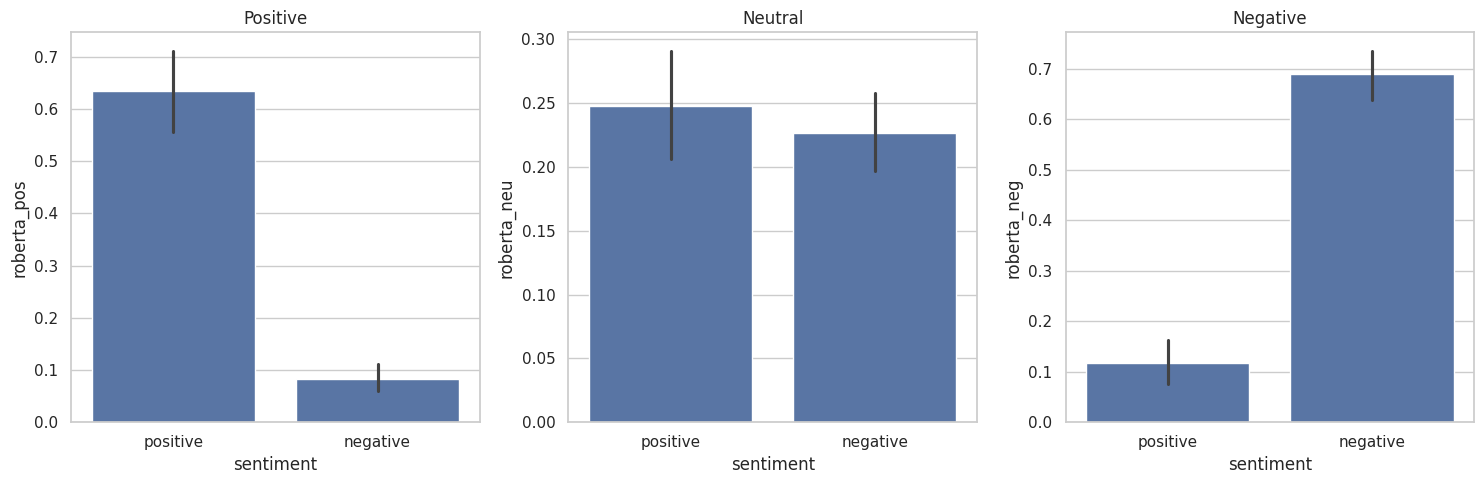

In [185]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=results_df, x='sentiment', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='sentiment', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='sentiment', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Transformers Pipeline

In [151]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [152]:
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
      text = row['review']
      sentiment_analysis = sent_pipeline(text)
      result[i] = sentiment_analysis[0]['label']

    except RuntimeError:
      print(f'Broke for row {i}')

  0%|          | 0/150 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (563 > 512). Running this sequence through the model will result in indexing errors


Broke for row 12
Broke for row 26
Broke for row 29
Broke for row 30
Broke for row 33
Broke for row 35
Broke for row 48
Broke for row 50
Broke for row 51
Broke for row 58
Broke for row 59
Broke for row 77
Broke for row 83
Broke for row 92
Broke for row 99
Broke for row 101
Broke for row 126
Broke for row 131
Broke for row 135
Broke for row 140
Broke for row 142


In [153]:
# convert result to df
transformers_df = pd.Series(result).to_frame('transformer_sentiment')

# merge scores with df
results_df = transformers_df.merge(results_df, how='left', left_index=True, right_index=True)
results_df['transformer_sentiment'] = results_df['transformer_sentiment'].str.lower()
results_df.head()

,transformer_sentiment,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,sentiment
0,negative,0.203,0.748,0.048,-0.9951,0.339792,0.462738,0.197471,One of the other reviewers has mentioned that ...,positive
1,positive,0.053,0.776,0.172,0.9641,0.004337,0.039048,0.956615,A wonderful little production. <br /><br />The...,positive
2,positive,0.094,0.714,0.192,0.9605,0.088475,0.263144,0.648381,I thought this was a wonderful way to spend ti...,positive
3,negative,0.138,0.797,0.065,-0.9213,0.755117,0.211640,0.033243,Basically there's a family where a little boy ...,negative
4,positive,0.052,0.801,0.147,0.9744,0.024546,0.223598,0.751856,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Comparing Results

In [154]:
# create a new column for VADER sentiment label
results_df['vader_sentiment'] = results_df['vader_compound'].apply(lambda x: 'positive' if x >= 0.0 else 'negative')

# create a new column for RoBERTa sentiment label based on which score is higher
results_df['roberta_sentiment'] = results_df.apply(lambda row: 'positive' if row['roberta_pos'] > row['roberta_neg'] else 'negative', axis=1)

results_df[['vader_sentiment', 'roberta_sentiment', 'transformer_sentiment', 'sentiment']].head()


,vader_sentiment,roberta_sentiment,transformer_sentiment,sentiment
0,negative,negative,negative,positive
1,positive,positive,positive,positive
2,positive,positive,positive,positive
3,negative,negative,negative,negative
4,positive,positive,positive,positive


In [155]:
# calculate correct predictions for each model
results_df['vader_correct'] = results_df['vader_sentiment'] == results_df['sentiment']
results_df['roberta_correct'] = results_df['roberta_sentiment'] == results_df['sentiment']
results_df['transformer_correct'] = results_df['transformer_sentiment'] == results_df['sentiment']
results_df.drop(columns=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg','roberta_neu','roberta_pos', 'vader_compound'], inplace=True)
results_df.head()

,transformer_sentiment,review,sentiment,vader_sentiment,roberta_sentiment,vader_correct,roberta_correct,transformer_correct
0,negative,One of the other reviewers has mentioned that ...,positive,negative,negative,False,False,False
1,positive,A wonderful little production. <br /><br />The...,positive,positive,positive,True,True,True
2,positive,I thought this was a wonderful way to spend ti...,positive,positive,positive,True,True,True
3,negative,Basically there's a family where a little boy ...,negative,negative,negative,True,True,True
4,positive,"Petter Mattei's ""Love in the Time of Money"" is...",positive,positive,positive,True,True,True


In [156]:
# define the conditions for each metric
results_df['vader_correct_positive'] = ((results_df['vader_sentiment'] == 'positive') & (results_df['sentiment'] == 'positive')).astype(int)
results_df['vader_correct_negative'] = ((results_df['vader_sentiment'] == 'negative') & (results_df['sentiment'] == 'negative')).astype(int)
results_df['vader_false_positive'] = ((results_df['vader_sentiment'] == 'positive') & (results_df['sentiment'] == 'negative')).astype(int)
results_df['vader_false_negative'] = ((results_df['vader_sentiment'] == 'negative') & (results_df['sentiment'] == 'positive')).astype(int)

results_df['roberta_correct_positive'] = ((results_df['roberta_sentiment'] == 'positive') & (results_df['sentiment'] == 'positive')).astype(int)
results_df['roberta_correct_negative'] = ((results_df['roberta_sentiment'] == 'negative') & (results_df['sentiment'] == 'negative')).astype(int)
results_df['roberta_false_positive'] = ((results_df['roberta_sentiment'] == 'positive') & (results_df['sentiment'] == 'negative')).astype(int)
results_df['roberta_false_negative'] = ((results_df['roberta_sentiment'] == 'negative') & (results_df['sentiment'] == 'positive')).astype(int)

results_df['transformer_correct_positive'] = ((results_df['transformer_sentiment'] == 'positive') & (results_df['sentiment'] == 'positive')).astype(int)
results_df['transformer_correct_negative'] = ((results_df['transformer_sentiment'] == 'negative') & (results_df['sentiment'] == 'negative')).astype(int)
results_df['transformer_false_positive'] = ((results_df['transformer_sentiment'] == 'positive') & (results_df['sentiment'] == 'negative')).astype(int)
results_df['transformer_false_negative'] = ((results_df['transformer_sentiment'] == 'negative') & (results_df['sentiment'] == 'positive')).astype(int)

results_df.head()

,transformer_sentiment,review,sentiment,vader_sentiment,roberta_sentiment,vader_correct,roberta_correct,transformer_correct,vader_correct_positive,vader_correct_negative,vader_false_positive,vader_false_negative,roberta_correct_positive,roberta_correct_negative,roberta_false_positive,roberta_false_negative,transformer_correct_positive,transformer_correct_negative,transformer_false_positive,transformer_false_negative
0,negative,One of the other reviewers has mentioned that ...,positive,negative,negative,False,False,False,0,0,0,1,0,0,0,1,0,0,0,1
1,positive,A wonderful little production. <br /><br />The...,positive,positive,positive,True,True,True,1,0,0,0,1,0,0,0,1,0,0,0
2,positive,I thought this was a wonderful way to spend ti...,positive,positive,positive,True,True,True,1,0,0,0,1,0,0,0,1,0,0,0
3,negative,Basically there's a family where a little boy ...,negative,negative,negative,True,True,True,0,1,0,0,0,1,0,0,0,1,0,0
4,positive,"Petter Mattei's ""Love in the Time of Money"" is...",positive,positive,positive,True,True,True,1,0,0,0,1,0,0,0,1,0,0,0


In [157]:
# total number of predictions
total_predictions = len(results_df)

# summary df
results_summary_df = pd.DataFrame({
    'Model': ['VADER', 'RoBERTa', 'Transformers'],
    'Correct Predictions': [
        results_df['vader_correct'].sum(),
        results_df['roberta_correct'].sum(),
        results_df['transformer_correct'].sum()
    ],
    'Percentage Correct': [
        results_df['vader_correct'].sum() / total_predictions * 100,
        results_df['roberta_correct'].sum() / total_predictions * 100,
        results_df['transformer_correct'].sum() / total_predictions * 100
    ],
    'False Positives': [
        results_df['vader_false_positive'].sum(),
        results_df['roberta_false_positive'].sum(),
        results_df['transformer_false_positive'].sum()
    ],
    'False Negatives': [
        results_df['vader_false_negative'].sum(),
        results_df['roberta_false_negative'].sum(),
        results_df['transformer_false_negative'].sum()
    ],
    'Correct Positives': [
        results_df['vader_correct_positive'].sum(),
        results_df['roberta_correct_positive'].sum(),
        results_df['transformer_correct_positive'].sum()
    ],
    'Correct Negatives': [
        results_df['vader_correct_negative'].sum(),
        results_df['roberta_correct_negative'].sum(),
        results_df['transformer_correct_negative'].sum()
    ]
})

print(results_summary_df)

          Model  Correct Predictions  Percentage Correct  False Positives  \
0         VADER                   91           70.542636               30   
1       RoBERTa                  115           89.147287                4   
2  Transformers                  115           89.147287                2   

   False Negatives  Correct Positives  Correct Negatives  
0                8                 46                 45  
1               10                 44                 71  
2               12                 42                 73  


### Plot final results

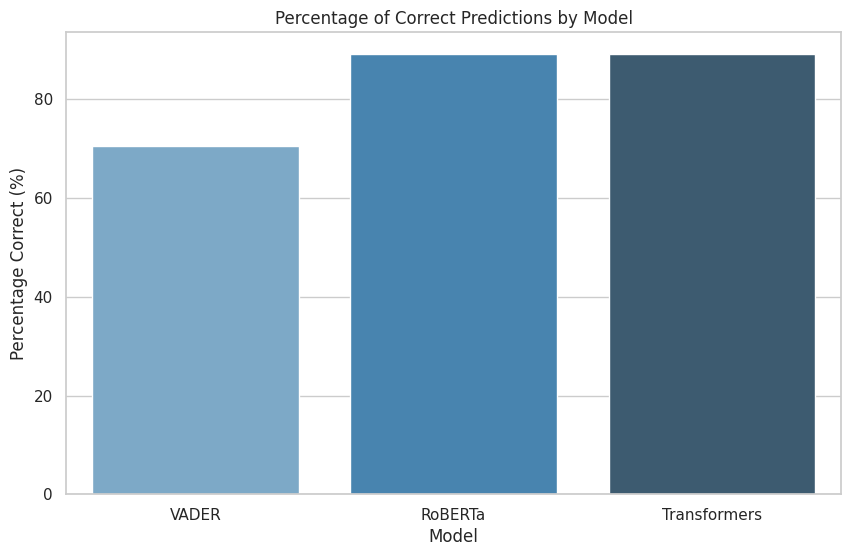

In [158]:
sns.set(style="whitegrid")

# bar plot for Percentage Correct
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Percentage Correct', hue='Model', data=results_summary_df, palette='Blues_d', dodge=False)

# labels and title
plt.xlabel('Model')
plt.ylabel('Percentage Correct (%)')
plt.title('Percentage of Correct Predictions by Model')

plt.show()

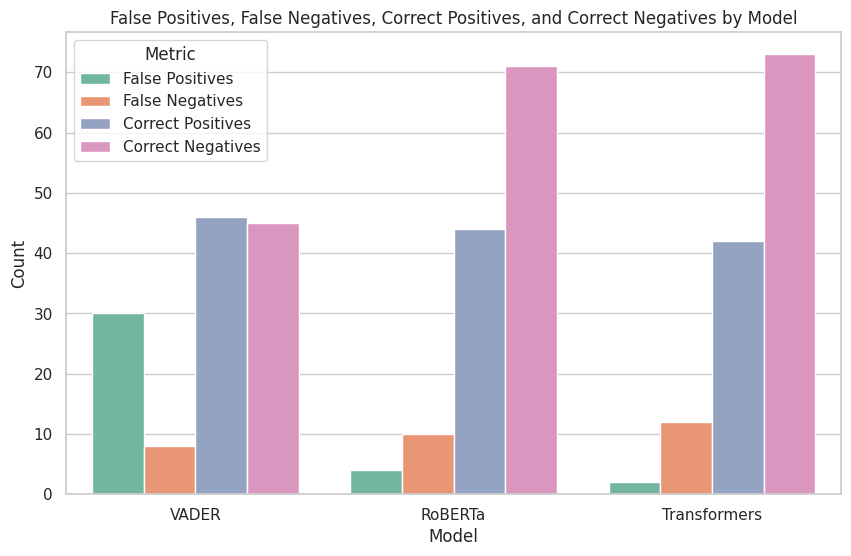

In [159]:
# new df to plot results
plot_df = pd.melt(
    results_summary_df,
    id_vars=['Model'],
    value_vars=['False Positives', 'False Negatives', 'Correct Positives', 'Correct Negatives'],
    var_name='Metric',
    value_name='Count'
)

# create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Count', hue='Metric', data=plot_df, palette='Set2')

# title and labels
plt.title('False Positives, False Negatives, Correct Positives, and Correct Negatives by Model')
plt.xlabel('Model')
plt.ylabel('Count')

# display the legend
plt.legend(title='Metric')

plt.show()